In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:

President Franklin D. Roosevelt in 1941
President John F. Kennedy in 1961
President Richard Nixon in 1973

In [29]:
import nltk
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import re
from wordcloud import WordCloud, STOPWORDS 
nltk.download('inaugural')
from nltk.corpus import inaugural,stopwords
inaugural.fileids()

Roosevelt=inaugural.raw('1941-Roosevelt.txt')

kennedy=inaugural.raw('1961-Kennedy.txt')

Nixon=inaugural.raw('1973-Nixon.txt')
field_id=['1941-Roosevelt.txt','1961-Kennedy.txt','1973-Nixon.txt']


[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


In [2]:
Roosevelt=inaugural.raw('1941-Roosevelt.txt')

kennedy=inaugural.raw('1961-Kennedy.txt')

Nixon=inaugural.raw('1973-Nixon.txt')

In [5]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Find the no of characters,word and sentences for the mentioned documets 

In [6]:
result_data=pd.DataFrame(index=field_id,columns=['no_car','no_words','no_sents'])

In [7]:
for i in field_id:
    result_data.loc[i,'no_car']=len(inaugural.raw(i))    # count the characters 
    result_data.loc[i,'no_car']=len([j for j in inaugural.words(i) if j[0].isalpha()])
    result_data.loc[i,'no_car']=len(inaugural.sents(i)) # count the sentence 
    

In [8]:
result_data


,no_car,no_words,no_sents
1941-Roosevelt.txt,68,NaN,NaN
1961-Kennedy.txt,52,NaN,NaN
1973-Nixon.txt,69,NaN,NaN


# Remove the stopwords from the speeches 

In [16]:
def remove_stop(text):
    text=re.sub(r'[,--:\'\d]','',text)
    new_text=''
    for i in text.split():
        if i.lower() not in stopwords.words('english'):
            new_text=new_text+' '+i.lower()
                     
    return (new_text)
        



In [11]:
len(stopwords.words('english'))

179

In [15]:
Nixon_new=remove_stop(Nixon)
Roosevelt_new=remove_stop(Roosevelt)
kennedy_new=remove_stop(kennedy)

<ipython-input-10-a6003ad87f81>:2: FutureWarning: Possible set difference at position 2
  text=re.sub(r'[,--:\'\d]','',text)


In [17]:
Nixon[:200]

'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America wa'

In [19]:
Nixon_new[:200]   # stop words removed 

' mr. vice president mr. speaker mr. chief justice senator cook mrs. eisenhower fellow citizens great good country share together met four years ago america bleak spirit depressed prospect seemingly en'

# which word occur the most number of times in speech 

In [20]:
result_data.loc['1941-Roosevelt.txt','most_repeat']=pd.Series(Roosevelt_new.split()).value_counts().index[0]
result_data.loc['1961-Kennedy.txt','most_repeat']=pd.Series(kennedy_new.split()).value_counts().index[0]
result_data.loc['1973-Nixon.txt','most_repeat']=pd.Series(Nixon_new.split()).value_counts().index[0]

In [21]:
result_data

,no_car,no_words,no_sents,most_repeat
1941-Roosevelt.txt,68,NaN,NaN,know
1961-Kennedy.txt,52,NaN,NaN,let
1973-Nixon.txt,69,NaN,NaN,us


# Top three words (after removing the stopwords)



In [24]:
result_data.loc['1941-Roosevelt.txt','top_3']=str([i for i in pd.Series(Roosevelt_new.split()).value_counts().index[0:3]])
result_data.loc['1961-Kennedy.txt','top_3']=str([i for i in pd.Series(kennedy_new.split()).value_counts().index[0:3]])
result_data.loc['1973-Nixon.txt','top_3']=str([i for i in pd.Series(Nixon_new.split()).value_counts().index[0:3]])

In [25]:
result_data

,no_car,no_words,no_sents,most_repeat,top_3
1941-Roosevelt.txt,68,NaN,NaN,know,"['know', 'nation', 'us']"
1961-Kennedy.txt,52,NaN,NaN,let,"['let', 'us', 'sides']"
1973-Nixon.txt,69,NaN,NaN,us,"['us', 'let', 'new']"


# plot the word cloud of each of the speeches of the variables ( after removing the stopwords)

In [26]:
from wordcloud import wordcloud ,STOPWORDS

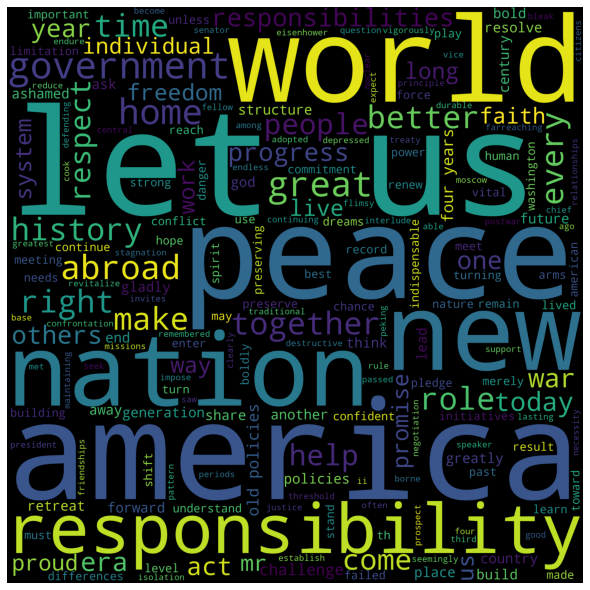

In [30]:
# wordcloud 
wordcloud=WordCloud(width=3000,height=3000,background_color='black',min_font_size=10,random_state=100).generate(Nixon_new)

# plot the word cloud image 
plt.figure(figsize=(8,8),facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.xlabel('word cloud')
plt.tight_layout(pad=0)

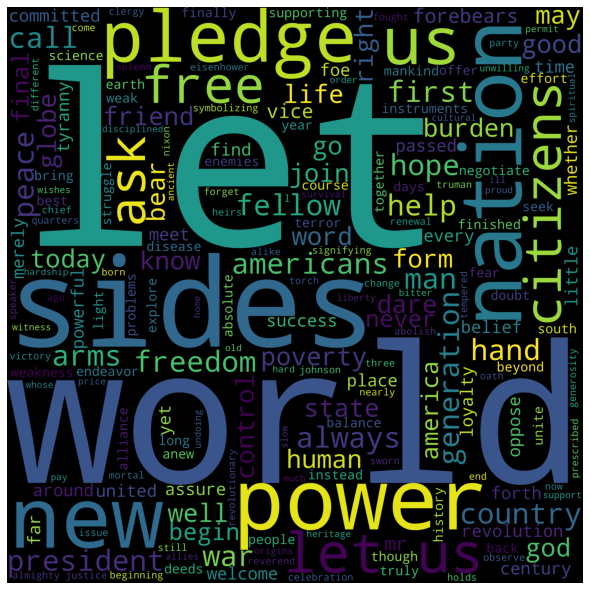

In [31]:
# wordcloud
wordcloud=WordCloud(width=3000,height=3000,background_color='black',min_font_size=10,random_state=100).generate(kennedy_new)

# plot the word cloud image 
plt.figure(figsize=(8,8),facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.xlabel('word cloud')
plt.tight_layout(pad=0)

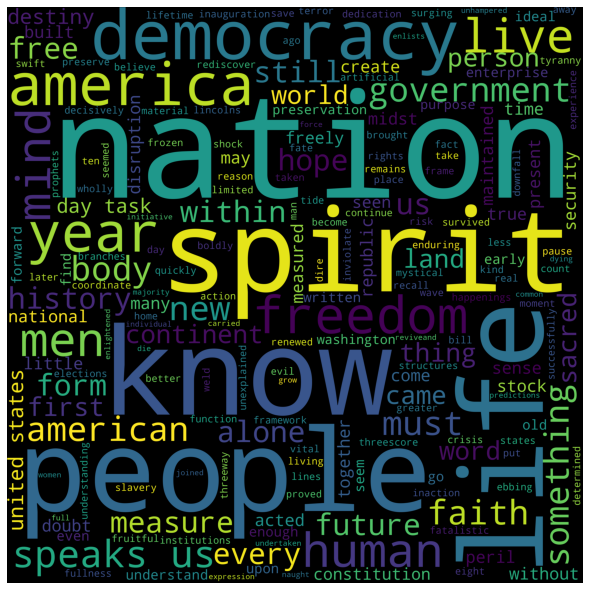

In [32]:
# wordcloud 
wordcloud=WordCloud(width=3000,height=3000,background_color='black',min_font_size=10,random_state=100).generate(Roosevelt_new)

# plot the word cloud image 
plt.figure(figsize=(8,8),facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.xlabel('word cloud')
plt.tight_layout(pad=0)